# YFinance Data Description and Demonstration

This notebook provides a comprehensive description and demonstration of the yfinance data structure and capabilities. It shows what data is available, how it's structured, and provides examples of how to access and use the data.

**Group Members:** Chanel, Do Tien Son, Marcus, Afiq, Hannah  
**Course:** INF1002 - PROGRAMMING FUNDAMENTALS, LAB-P13-3

## What This Notebook Covers:
- What data fields are available from Yahoo Finance
- How the data is structured in pandas DataFrames
- Data types and formats
- Available time periods and intervals
- Data quality and completeness
- Practical examples and usage patterns


In [1]:
# Import required libraries
import yfinance as yf  # Yahoo Finance data library
import pandas as pd  # Data manipulation library
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical plotting
from datetime import datetime, timedelta  # Date handling
import warnings  # Warning suppression

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

print("📊 Libraries imported successfully!")
print(f"yfinance version: {yf.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")


📊 Libraries imported successfully!
yfinance version: 0.2.65
pandas version: 2.2.3
numpy version: 2.1.3


## 1. Basic Stock Information

Let's start by getting basic information about a stock. We'll use Apple (AAPL) as our example throughout this notebook.


In [2]:
# Create a ticker object for demonstration (using Apple stock)
ticker_symbol = "AAPL"
ticker = yf.Ticker(ticker_symbol)

print(f"📊 ANALYZING DATA FOR: {ticker_symbol}")
print("=" * 50)

# Get basic stock information
try:
    info = ticker.info
    print(f"Company Name: {info.get('longName', 'N/A')}")
    print(f"Industry: {info.get('industry', 'N/A')}")
    print(f"Sector: {info.get('sector', 'N/A')}")
    print(f"Market Cap: ${info.get('marketCap', 0):,}")
    print(f"Currency: {info.get('currency', 'N/A')}")
    print(f"Exchange: {info.get('exchange', 'N/A')}")
    print(f"Website: {info.get('website', 'N/A')}")
    print(f"Employees: {info.get('fullTimeEmployees', 'N/A'):,}")
except Exception as e:
    print(f"Error getting basic info: {e}")


📊 ANALYZING DATA FOR: AAPL
Company Name: Apple Inc.
Industry: Consumer Electronics
Sector: Technology
Market Cap: $3,829,710,979,072
Currency: USD
Exchange: NMS
Website: https://www.apple.com
Employees: 150,000


## 2. Historical Data Structure

Now let's download and examine the historical data structure.


In [3]:
# Download 1 year of data
data = ticker.history(period="1y")

print(f"Data Shape: {data.shape}")
print(f"Date Range: {data.index[0].strftime('%Y-%m-%d')} to {data.index[-1].strftime('%Y-%m-%d')}")
print(f"Total Trading Days: {len(data)}")

print("\nData Columns Available:")
for i, col in enumerate(data.columns, 1):
    print(f"{i}. {col}")

print("\nColumn Descriptions:")
column_descriptions = {
    'Open': 'Opening price for the trading day',
    'High': 'Highest price during the trading day',
    'Low': 'Lowest price during the trading day',
    'Close': 'Closing price for the trading day',
    'Volume': 'Number of shares traded',
    'Dividends': 'Dividend payments (if any)',
    'Stock Splits': 'Stock split information (if any)'
}

for col, desc in column_descriptions.items():
    if col in data.columns:
        print(f"• {col}: {desc}")


Data Shape: (250, 7)
Date Range: 2024-10-09 to 2025-10-08
Total Trading Days: 250

Data Columns Available:
1. Open
2. High
3. Low
4. Close
5. Volume
6. Dividends
7. Stock Splits

Column Descriptions:
• Open: Opening price for the trading day
• High: Highest price during the trading day
• Low: Lowest price during the trading day
• Close: Closing price for the trading day
• Volume: Number of shares traded
• Dividends: Dividend payments (if any)
• Stock Splits: Stock split information (if any)


### Data Types and Sample Data


In [4]:
# Show data types
print("Data Types:")
print(data.dtypes)

# Show first few rows
print("\nFirst 5 Rows of Data:")
display(data.head().round(2))

# Show last few rows
print("\nLast 5 Rows of Data:")
display(data.tail().round(2))


Data Types:
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

First 5 Rows of Data:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-09 00:00:00-04:00,224.19,228.69,223.79,228.48,33591100,0.0,0.0
2024-10-10 00:00:00-04:00,226.72,228.44,226.12,227.98,28183500,0.0,0.0
2024-10-11 00:00:00-04:00,228.24,228.35,226.29,226.50,31759200,0.0,0.0
2024-10-14 00:00:00-04:00,227.64,230.66,227.54,230.23,39882100,0.0,0.0
2024-10-15 00:00:00-04:00,232.53,236.39,231.29,232.77,64751400,0.0,0.0



Last 5 Rows of Data:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-10-02 00:00:00-04:00,256.58,258.18,254.15,257.13,42630200,0.0,0.0
2025-10-03 00:00:00-04:00,254.67,259.24,253.95,258.02,49155600,0.0,0.0
2025-10-06 00:00:00-04:00,257.99,259.07,255.05,256.69,44664100,0.0,0.0
2025-10-07 00:00:00-04:00,256.81,257.40,255.43,256.48,31955800,0.0,0.0
2025-10-08 00:00:00-04:00,256.52,258.52,256.11,258.06,36465000,0.0,0.0


## 3. Data Quality Analysis

Let's examine the quality and completeness of our data.


Missing Values per Column:
• Open: 0 missing (0.0%)
• High: 0 missing (0.0%)
• Low: 0 missing (0.0%)
• Close: 0 missing (0.0%)
• Volume: 0 missing (0.0%)
• Dividends: 0 missing (0.0%)
• Stock Splits: 0 missing (0.0%)

Data Completeness: 14.3%


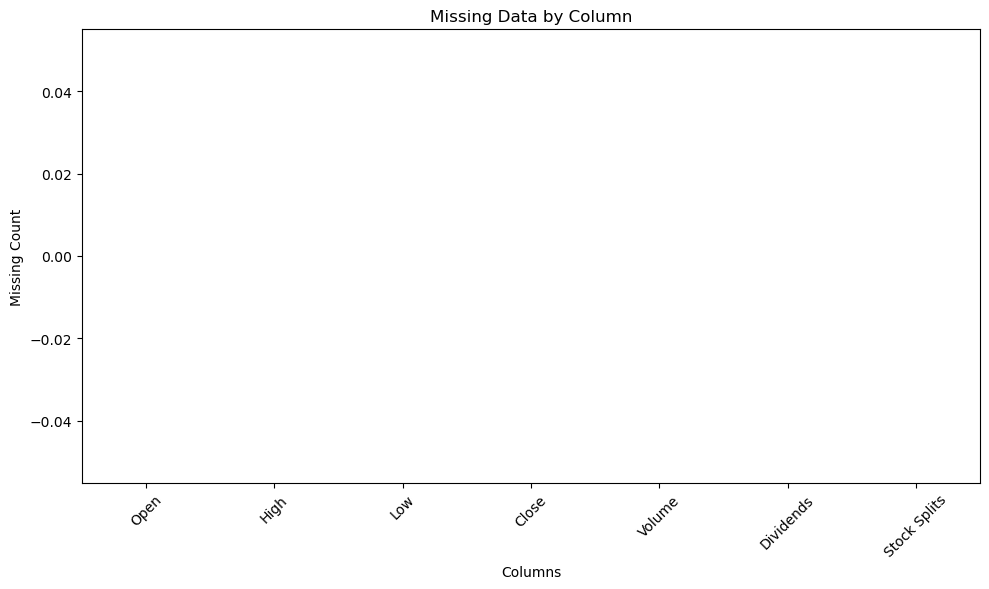

In [5]:
print("Missing Values per Column:")
missing_data = data.isnull().sum()
for col, missing_count in missing_data.items():
    percentage = (missing_count / len(data)) * 100
    print(f"• {col}: {missing_count} missing ({percentage:.1f}%)")

print(f"\nData Completeness: {((len(data) - missing_data.sum()) / (len(data) * len(data.columns))) * 100:.1f}%")

# Visualize missing data
plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar')
plt.title('Missing Data by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4. Statistical Summary

Let's look at the statistical properties of our data.


Price Statistics (USD):


,Open,High,Low,Close
count,250.00,250.00,250.00,250.00
mean,223.74,226.35,221.55,224.11
std,17.89,17.45,18.18,17.98
min,171.53,189.88,168.80,172.00
25%,209.73,211.76,207.58,209.77
50%,226.32,229.01,224.53,227.01
75%,236.49,239.33,233.54,236.74
max,257.99,259.24,256.72,258.10



Volume Statistics:


count          250.0
mean      53838818.0
std       23320446.0
min       23234700.0
25%       39844525.0
50%       47127450.0
75%       56818575.0
max      184395900.0
Name: Volume, dtype: float64

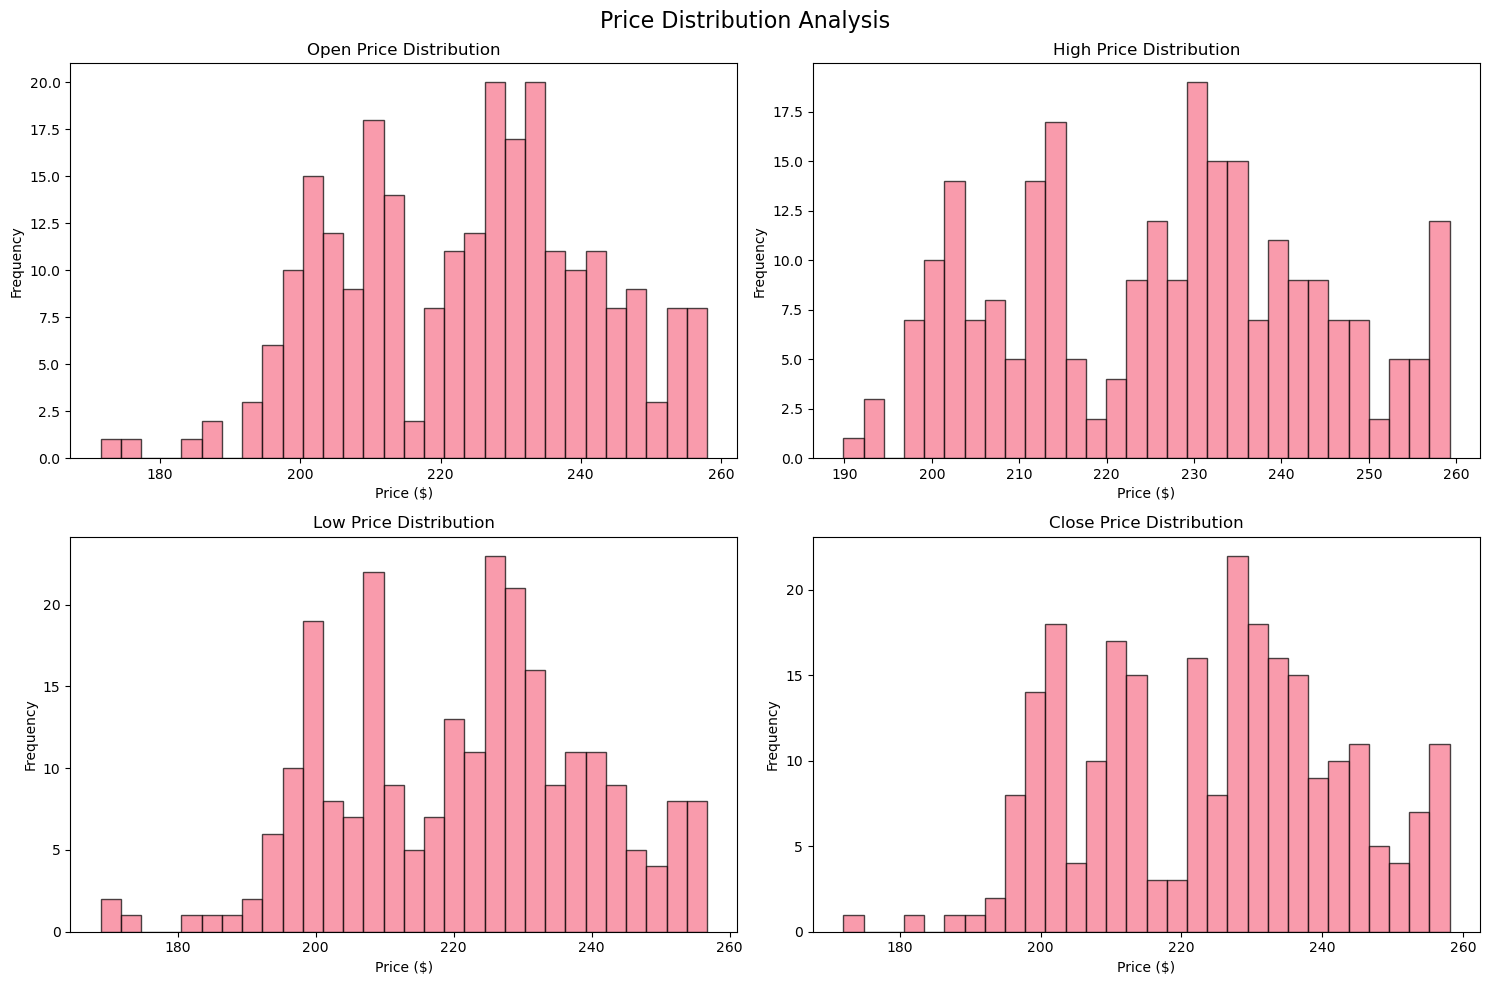

In [6]:
print("Price Statistics (USD):")
price_stats = data[['Open', 'High', 'Low', 'Close']].describe()
display(price_stats.round(2))

print("\nVolume Statistics:")
volume_stats = data['Volume'].describe()
display(volume_stats.round(0))

# Visualize price distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Price Distribution Analysis', fontsize=16)

price_columns = ['Open', 'High', 'Low', 'Close']
for i, col in enumerate(price_columns):
    row, col_idx = i // 2, i % 2
    axes[row, col_idx].hist(data[col], bins=30, alpha=0.7, edgecolor='black')
    axes[row, col_idx].set_title(f'{col} Price Distribution')
    axes[row, col_idx].set_xlabel('Price ($)')
    axes[row, col_idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## 5. Available Time Periods

yfinance supports various time periods for data download.


In [7]:
time_periods = {
    '1d': '1 day',
    '5d': '5 days',
    '1mo': '1 month',
    '3mo': '3 months',
    '6mo': '6 months',
    '1y': '1 year',
    '2y': '2 years',
    '5y': '5 years',
    '10y': '10 years',
    'ytd': 'Year to date',
    'max': 'Maximum available'
}

print("Available Period Options:")
for period, description in time_periods.items():
    print(f"• '{period}': {description}")

# Demonstrate different time periods
print("\nData Availability by Time Period:")
test_periods = ['1mo', '3mo', '6mo', '1y', '2y', '5y']
period_data = {}

for period in test_periods:
    try:
        test_data = ticker.history(period=period)
        period_data[period] = test_data
        print(f"• {period:>3}: {len(test_data):>4} days ({test_data.index[0].strftime('%Y-%m-%d')} to {test_data.index[-1].strftime('%Y-%m-%d')})")
    except Exception as e:
        print(f"• {period:>3}: Error - {e}")


Available Period Options:
• '1d': 1 day
• '5d': 5 days
• '1mo': 1 month
• '3mo': 3 months
• '6mo': 6 months
• '1y': 1 year
• '2y': 2 years
• '5y': 5 years
• '10y': 10 years
• 'ytd': Year to date
• 'max': Maximum available

Data Availability by Time Period:
• 1mo:   22 days (2025-09-09 to 2025-10-08)
• 3mo:   65 days (2025-07-09 to 2025-10-08)
• 6mo:  126 days (2025-04-09 to 2025-10-08)
•  1y:  250 days (2024-10-09 to 2025-10-08)
•  2y:  502 days (2023-10-09 to 2025-10-08)
•  5y: 1255 days (2020-10-09 to 2025-10-08)


### Visualizing Different Time Periods


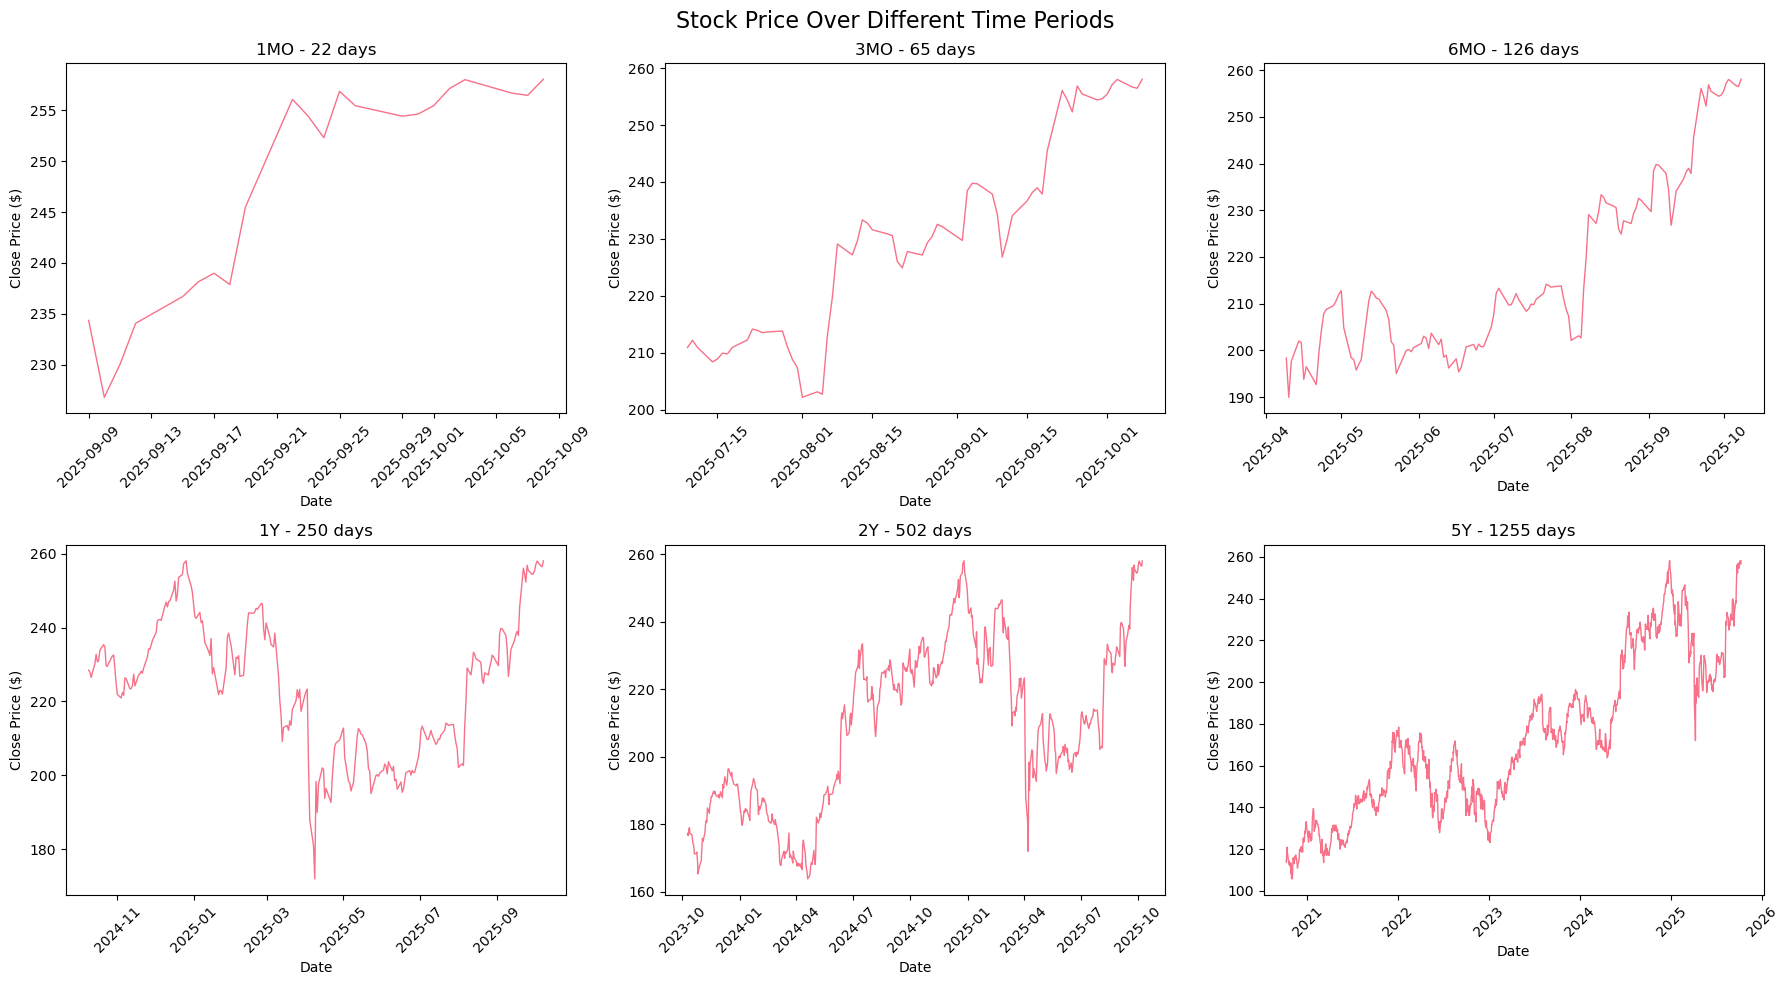

In [8]:
# Plot different time periods
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Stock Price Over Different Time Periods', fontsize=16)

for i, (period, period_data) in enumerate(period_data.items()):
    row, col = i // 3, i % 3
    axes[row, col].plot(period_data.index, period_data['Close'], linewidth=1)
    axes[row, col].set_title(f'{period.upper()} - {len(period_data)} days')
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Close Price ($)')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 6. Data Access Examples

Let's explore various ways to access and manipulate the data.


In [9]:
print("📈 DATA ACCESS EXAMPLES FOR AAPL")
print("=" * 50)

# Basic data access
print("1. Basic Data Access:")
print(f"   • Latest close price: ${data['Close'].iloc[-1]:.2f}")
print(f"   • First close price: ${data['Close'].iloc[0]:.2f}")
print(f"   • Price range: ${data['Low'].min():.2f} - ${data['High'].max():.2f}")

# Date-based access
print("\n2. Date-Based Access:")
print(f"   • Data starts: {data.index[0].strftime('%Y-%m-%d')}")
print(f"   • Data ends: {data.index[-1].strftime('%Y-%m-%d')}")
print(f"   • Total days: {len(data)}")

# Statistical access
print("\n3. Statistical Access:")
print(f"   • Mean close price: ${data['Close'].mean():.2f}")
print(f"   • Median close price: ${data['Close'].median():.2f}")
print(f"   • Standard deviation: ${data['Close'].std():.2f}")

# Conditional access
print("\n4. Conditional Access:")
high_volume_days = data[data['Volume'] > data['Volume'].mean()]
print(f"   • High volume days: {len(high_volume_days)}")
print(f"   • Average volume: {data['Volume'].mean():,.0f}")

# Price changes
price_change = data['Close'].iloc[-1] - data['Close'].iloc[0]
price_change_pct = (price_change / data['Close'].iloc[0]) * 100
print(f"\n5. Price Changes:")
print(f"   • Total change: ${price_change:.2f} ({price_change_pct:+.2f}%)")

# Daily returns calculation
daily_returns = data['Close'].pct_change() * 100
print(f"   • Average daily return: {daily_returns.mean():.4f}%")
print(f"   • Daily volatility: {daily_returns.std():.4f}%")


📈 DATA ACCESS EXAMPLES FOR AAPL
1. Basic Data Access:
   • Latest close price: $258.06
   • First close price: $228.48
   • Price range: $168.80 - $259.24

2. Date-Based Access:
   • Data starts: 2024-10-09
   • Data ends: 2025-10-08
   • Total days: 250

3. Statistical Access:
   • Mean close price: $224.11
   • Median close price: $227.01
   • Standard deviation: $17.98

4. Conditional Access:
   • High volume days: 81
   • Average volume: 53,838,818

5. Price Changes:
   • Total change: $29.58 (+12.95%)
   • Average daily return: 0.0693%
   • Daily volatility: 2.0361%


### Time Series Operations and Rolling Calculations


Rolling Calculations:
   • Current 5-day SMA: $257.28
   • Current 20-day SMA: $249.37
   • Current 50-day SMA: $235.33


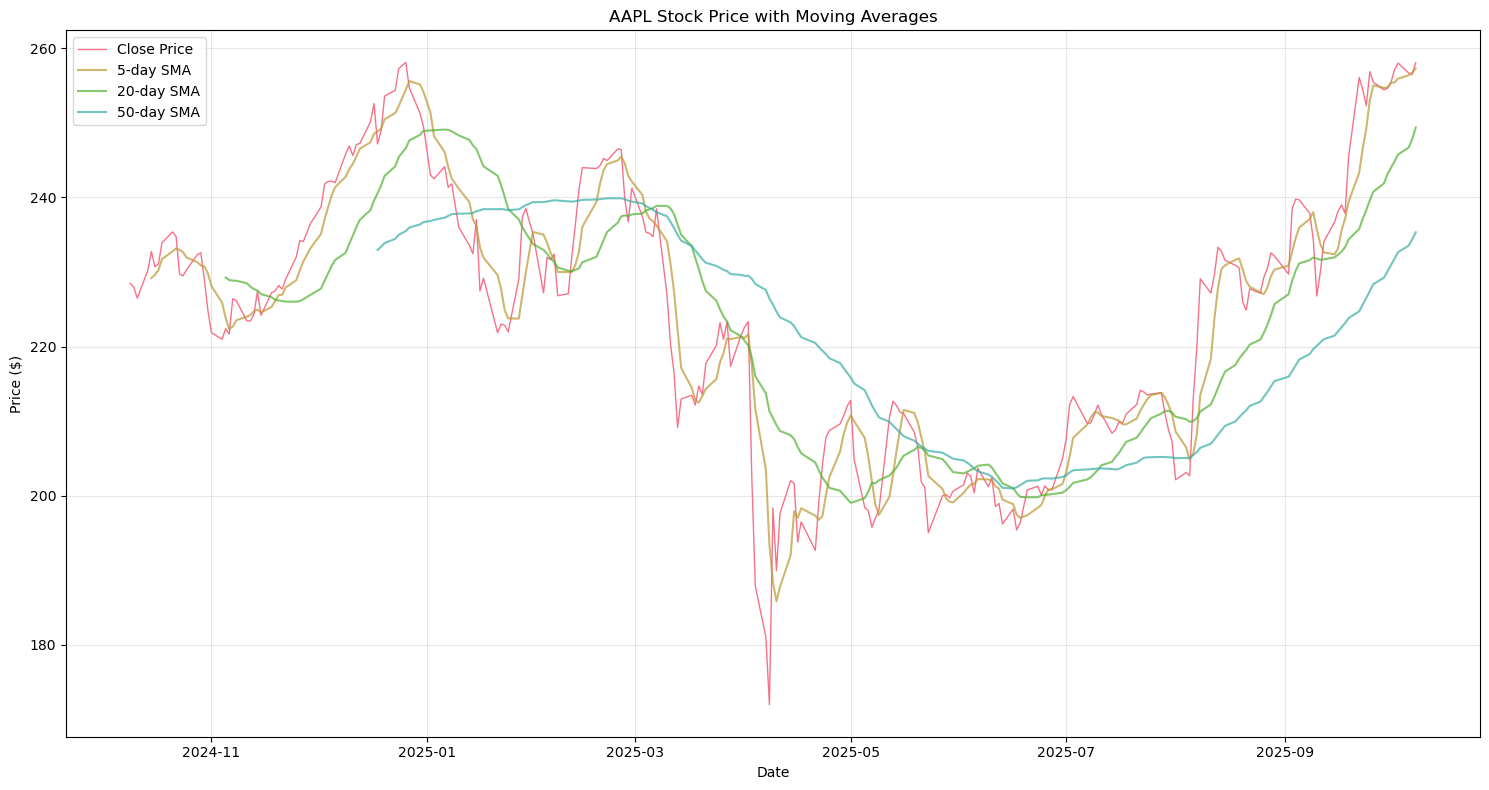

In [10]:
# Create a copy for analysis
analysis_data = data.copy()

# Time series operations
analysis_data['Price_Change'] = analysis_data['Close'].diff()
analysis_data['Price_Change_Pct'] = analysis_data['Close'].pct_change() * 100

# Rolling calculations
analysis_data['SMA_5'] = analysis_data['Close'].rolling(window=5).mean()
analysis_data['SMA_20'] = analysis_data['Close'].rolling(window=20).mean()
analysis_data['SMA_50'] = analysis_data['Close'].rolling(window=50).mean()

print("Rolling Calculations:")
print(f"   • Current 5-day SMA: ${analysis_data['SMA_5'].iloc[-1]:.2f}")
print(f"   • Current 20-day SMA: ${analysis_data['SMA_20'].iloc[-1]:.2f}")
print(f"   • Current 50-day SMA: ${analysis_data['SMA_50'].iloc[-1]:.2f}")

# Plot price and moving averages
plt.figure(figsize=(15, 8))
plt.plot(analysis_data.index, analysis_data['Close'], label='Close Price', linewidth=1)
plt.plot(analysis_data.index, analysis_data['SMA_5'], label='5-day SMA', alpha=0.7)
plt.plot(analysis_data.index, analysis_data['SMA_20'], label='20-day SMA', alpha=0.7)
plt.plot(analysis_data.index, analysis_data['SMA_50'], label='50-day SMA', alpha=0.7)
plt.title(f'{ticker_symbol} Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 7. Available Data Intervals

yfinance supports different data intervals for various timeframes.


In [11]:
intervals = {
    '1m': '1 minute (intraday only)',
    '2m': '2 minutes (intraday only)',
    '5m': '5 minutes (intraday only)',
    '15m': '15 minutes (intraday only)',
    '30m': '30 minutes (intraday only)',
    '60m': '60 minutes (intraday only)',
    '90m': '90 minutes (intraday only)',
    '1h': '1 hour (intraday only)',
    '1d': '1 day (default)',
    '5d': '5 days',
    '1wk': '1 week',
    '1mo': '1 month',
    '3mo': '3 months'
}

print("Available Interval Options:")
for interval, description in intervals.items():
    print(f"• '{interval}': {description}")

# Try to get intraday data (may not be available for all stocks)
print("\nTrying to get intraday data (5-minute intervals):")
try:
    intraday_data = ticker.history(period="1d", interval="5m")
    if len(intraday_data) > 0:
        print(f"✓ Intraday data available: {len(intraday_data)} data points")
        print(f"  Time range: {intraday_data.index[0]} to {intraday_data.index[-1]}")
        display(intraday_data.head())
    else:
        print("✗ No intraday data available")
except Exception as e:
    print(f"✗ Error getting intraday data: {e}")


Available Interval Options:
• '1m': 1 minute (intraday only)
• '2m': 2 minutes (intraday only)
• '5m': 5 minutes (intraday only)
• '15m': 15 minutes (intraday only)
• '30m': 30 minutes (intraday only)
• '60m': 60 minutes (intraday only)
• '90m': 90 minutes (intraday only)
• '1h': 1 hour (intraday only)
• '1d': 1 day (default)
• '5d': 5 days
• '1wk': 1 week
• '1mo': 1 month
• '3mo': 3 months

Trying to get intraday data (5-minute intervals):
✓ Intraday data available: 78 data points
  Time range: 2025-10-08 09:30:00-04:00 to 2025-10-08 15:55:00-04:00


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-10-08 09:30:00-04:00,256.529999,257.679901,256.359985,256.625000,2446571,0.0,0.0
2025-10-08 09:35:00-04:00,256.660004,256.890015,256.109985,256.279999,865891,0.0,0.0
2025-10-08 09:40:00-04:00,256.283386,257.434998,256.239990,256.920013,762656,0.0,0.0
2025-10-08 09:45:00-04:00,256.894989,257.570007,256.829987,257.334991,507868,0.0,0.0
2025-10-08 09:50:00-04:00,257.334991,257.890015,257.309998,257.342010,571027,0.0,0.0


## 8. Special Data Fields

Let's examine dividend and stock split information.


Dividend Information:
• Dividend payments: 4 days
• Total dividends: $1.02
• Latest dividend: $0.26 on 2025-08-11


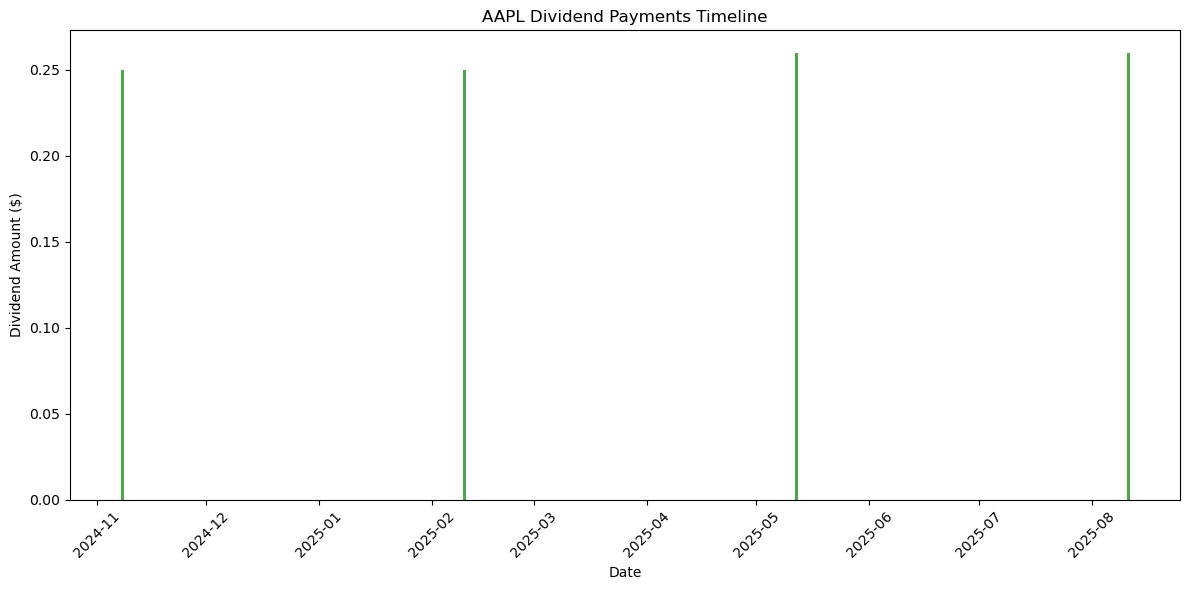


Stock Split Information:
• No stock splits in this period


In [12]:
print("Dividend Information:")
dividends = data['Dividends']
dividend_days = dividends[dividends > 0]
if len(dividend_days) > 0:
    print(f"• Dividend payments: {len(dividend_days)} days")
    print(f"• Total dividends: ${dividend_days.sum():.2f}")
    print(f"• Latest dividend: ${dividend_days.iloc[-1]:.2f} on {dividend_days.index[-1].strftime('%Y-%m-%d')}")
    
    # Plot dividend timeline
    plt.figure(figsize=(12, 6))
    plt.bar(dividend_days.index, dividend_days.values, alpha=0.7, color='green')
    plt.title(f'{ticker_symbol} Dividend Payments Timeline')
    plt.xlabel('Date')
    plt.ylabel('Dividend Amount ($)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("• No dividend payments in this period")

print("\nStock Split Information:")
splits = data['Stock Splits']
split_days = splits[splits > 0]
if len(split_days) > 0:
    print(f"• Stock splits: {len(split_days)} days")
    for date, split_ratio in split_days.items():
        print(f"• {date.strftime('%Y-%m-%d')}: {split_ratio}:1 split")
else:
    print("• No stock splits in this period")


## 9. Data Limitations and Considerations

Important things to know about yfinance data.


In [13]:
print("📋 DATA LIMITATIONS AND CONSIDERATIONS")
print("=" * 50)

print("Important Notes:")
print("• Data is delayed by 15-20 minutes for free users")
print("• Intraday data (1m, 5m, etc.) only available for recent periods")
print("• Some stocks may have limited historical data")
print("• Market holidays result in missing trading days")
print("• Data quality may vary for different exchanges")
print("• Free tier has rate limits (requests per minute)")

print("\nBest Practices:")
print("• Use appropriate time periods for your analysis")
print("• Check for missing data before analysis")
print("• Handle weekends and holidays appropriately")
print("• Consider data freshness for real-time applications")
print("• Implement error handling for network issues")

# Demonstrate error handling
print("\nError Handling Example:")
invalid_ticker = yf.Ticker("INVALID_SYMBOL_XYZ")
try:
    invalid_data = invalid_ticker.history(period="1mo")
    if len(invalid_data) == 0:
        print("✗ Invalid ticker symbol - no data returned")
    else:
        print("✓ Data retrieved successfully")
except Exception as e:
    print(f"✗ Error: {e}")


📋 DATA LIMITATIONS AND CONSIDERATIONS
Important Notes:
• Data is delayed by 15-20 minutes for free users
• Intraday data (1m, 5m, etc.) only available for recent periods
• Some stocks may have limited historical data
• Market holidays result in missing trading days
• Data quality may vary for different exchanges
• Free tier has rate limits (requests per minute)

Best Practices:
• Use appropriate time periods for your analysis
• Check for missing data before analysis
• Handle weekends and holidays appropriately
• Consider data freshness for real-time applications
• Implement error handling for network issues

Error Handling Example:


HTTP Error 404: 
$INVALID_SYMBOL_XYZ: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


✗ Invalid ticker symbol - no data returned


## 10. Usage in Our Stock Analysis Project

How we use yfinance data in our project.


In [14]:
print("🔧 USAGE IN OUR STOCK ANALYSIS PROJECT")
print("=" * 50)

print("How we use yfinance data:")
print("• Download historical OHLCV data for analysis")
print("• Calculate moving averages from Close prices")
print("• Compute daily returns for volatility analysis")
print("• Analyze price runs using High/Low data")
print("• Implement maximum profit algorithms")
print("• Create visualizations from price data")

print("\nData flow in our system:")
print("1. User selects stock symbol and time period")
print("2. yfinance downloads data from Yahoo Finance")
print("3. Data stored in pandas DataFrame")
print("4. Our algorithms process the data")
print("5. Results displayed in web interface")

# Demonstrate our project's data processing
print("\nExample: Our Project's Data Processing")
print("-" * 40)

# Simulate our project's calculations
project_data = data.copy()

# Calculate daily returns (as used in our project)
project_data['Daily_Returns'] = project_data['Close'].pct_change() * 100

# Calculate SMA (as used in our project)
project_data['SMA_20'] = project_data['Close'].rolling(window=20).mean()

# Analyze price runs (simplified version)
price_changes = project_data['Close'].diff()
positive_runs = (price_changes > 0).sum()
negative_runs = (price_changes < 0).sum()

print(f"• Daily returns calculated: {len(project_data['Daily_Returns'].dropna())} values")
print(f"• 20-day SMA calculated: {len(project_data['SMA_20'].dropna())} values")
print(f"• Positive price changes: {positive_runs} days")
print(f"• Negative price changes: {negative_runs} days")


🔧 USAGE IN OUR STOCK ANALYSIS PROJECT
How we use yfinance data:
• Download historical OHLCV data for analysis
• Calculate moving averages from Close prices
• Compute daily returns for volatility analysis
• Analyze price runs using High/Low data
• Implement maximum profit algorithms
• Create visualizations from price data

Data flow in our system:
1. User selects stock symbol and time period
2. yfinance downloads data from Yahoo Finance
3. Data stored in pandas DataFrame
4. Our algorithms process the data
5. Results displayed in web interface

Example: Our Project's Data Processing
----------------------------------------
• Daily returns calculated: 249 values
• 20-day SMA calculated: 231 values
• Positive price changes: 133 days
• Negative price changes: 115 days


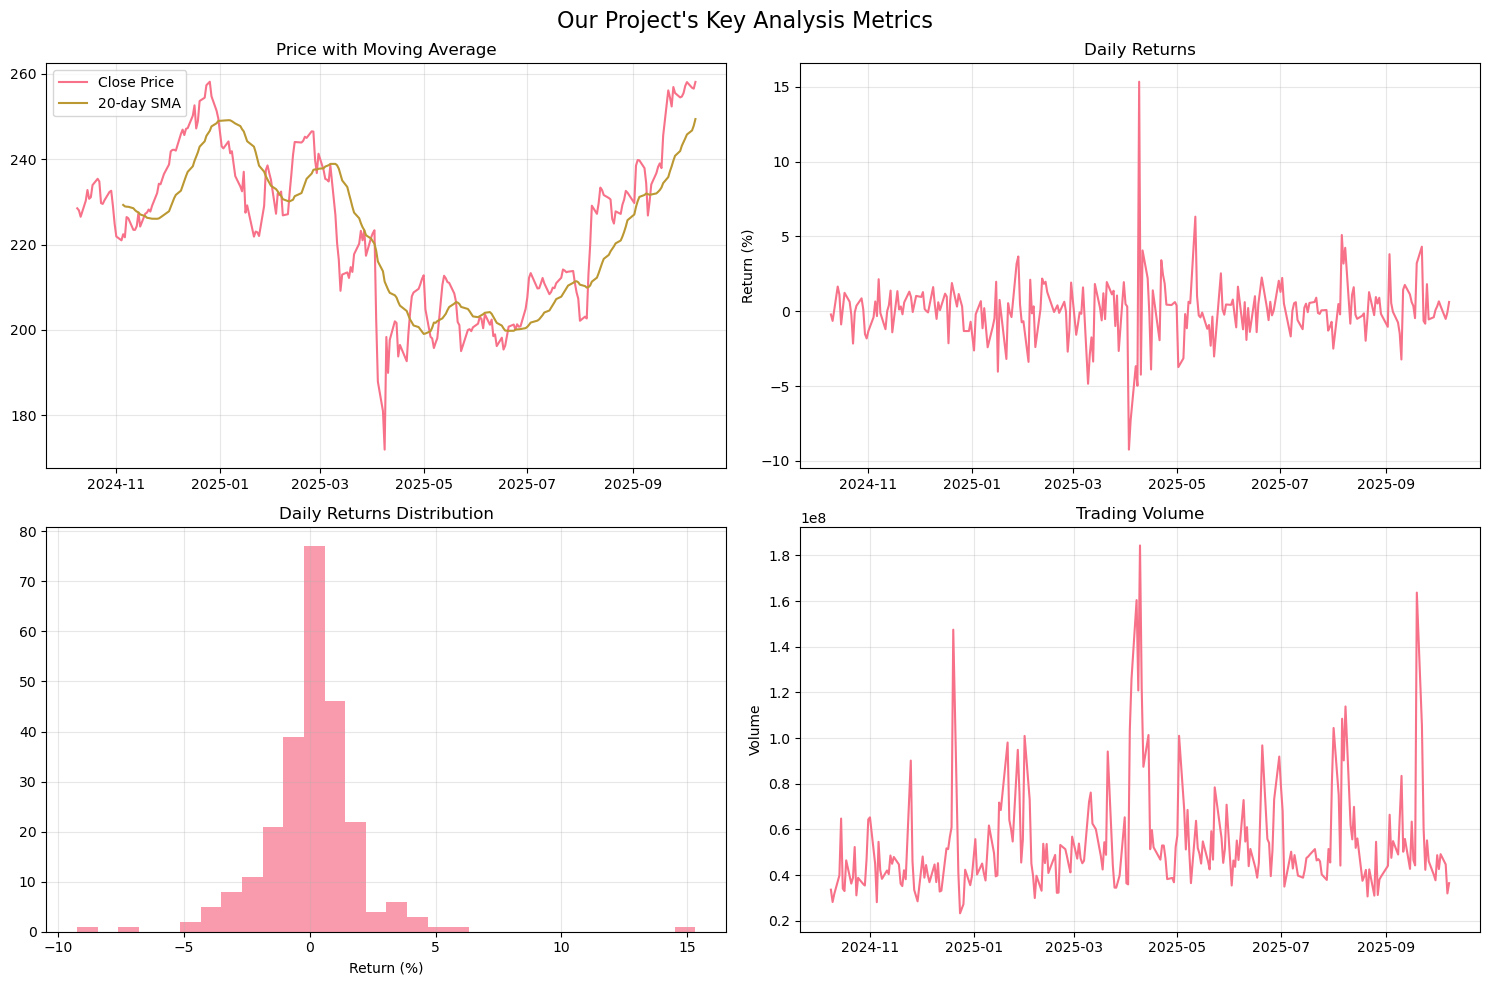

In [15]:
# Visualize our project's key metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Our Project\'s Key Analysis Metrics', fontsize=16)

# Price chart
axes[0, 0].plot(project_data.index, project_data['Close'], label='Close Price')
axes[0, 0].plot(project_data.index, project_data['SMA_20'], label='20-day SMA')
axes[0, 0].set_title('Price with Moving Average')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Daily returns
axes[0, 1].plot(project_data.index, project_data['Daily_Returns'])
axes[0, 1].set_title('Daily Returns')
axes[0, 1].set_ylabel('Return (%)')
axes[0, 1].grid(True, alpha=0.3)

# Returns histogram
axes[1, 0].hist(project_data['Daily_Returns'].dropna(), bins=30, alpha=0.7)
axes[1, 0].set_title('Daily Returns Distribution')
axes[1, 0].set_xlabel('Return (%)')
axes[1, 0].grid(True, alpha=0.3)

# Volume
axes[1, 1].plot(project_data.index, project_data['Volume'])
axes[1, 1].set_title('Trading Volume')
axes[1, 1].set_ylabel('Volume')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 11. Interactive Data Exploration

Let's create some interactive visualizations to better understand the data.


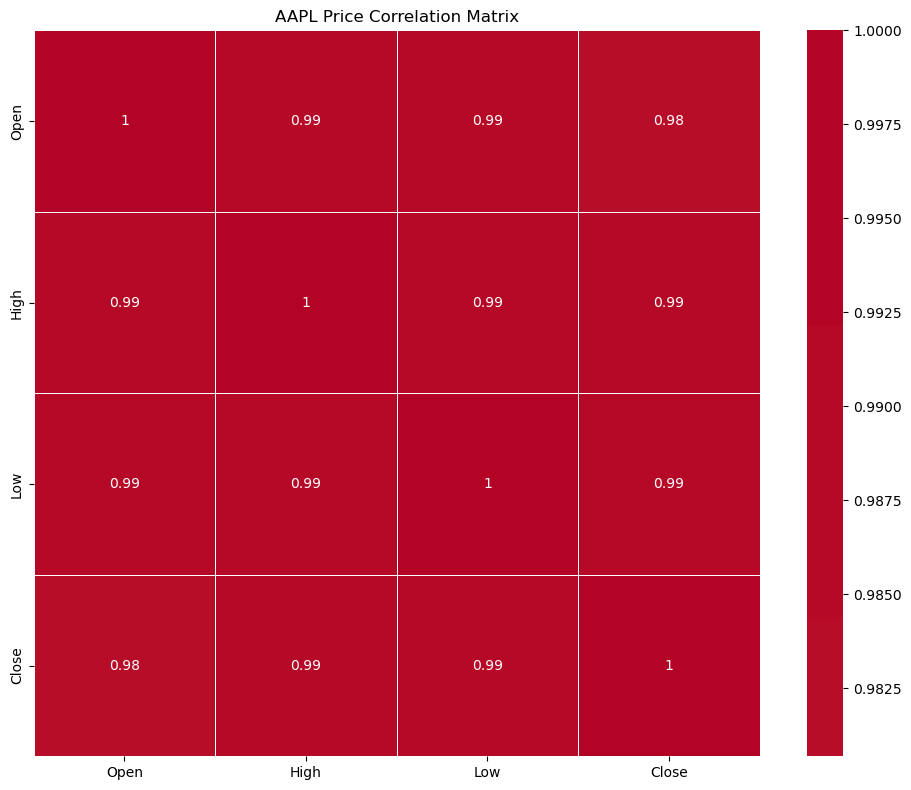

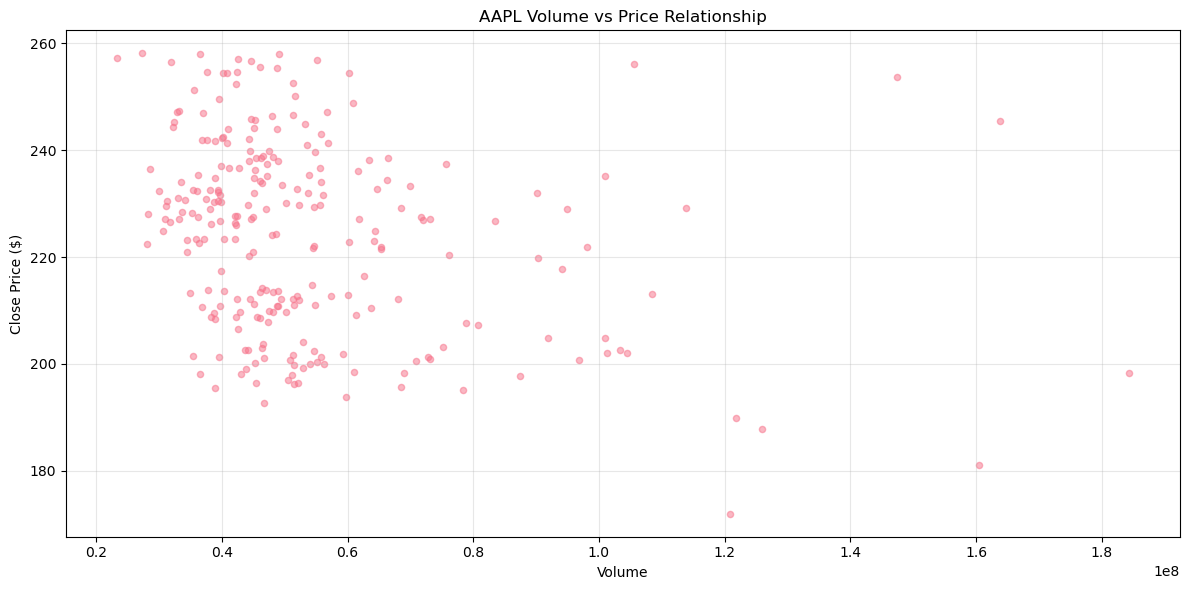

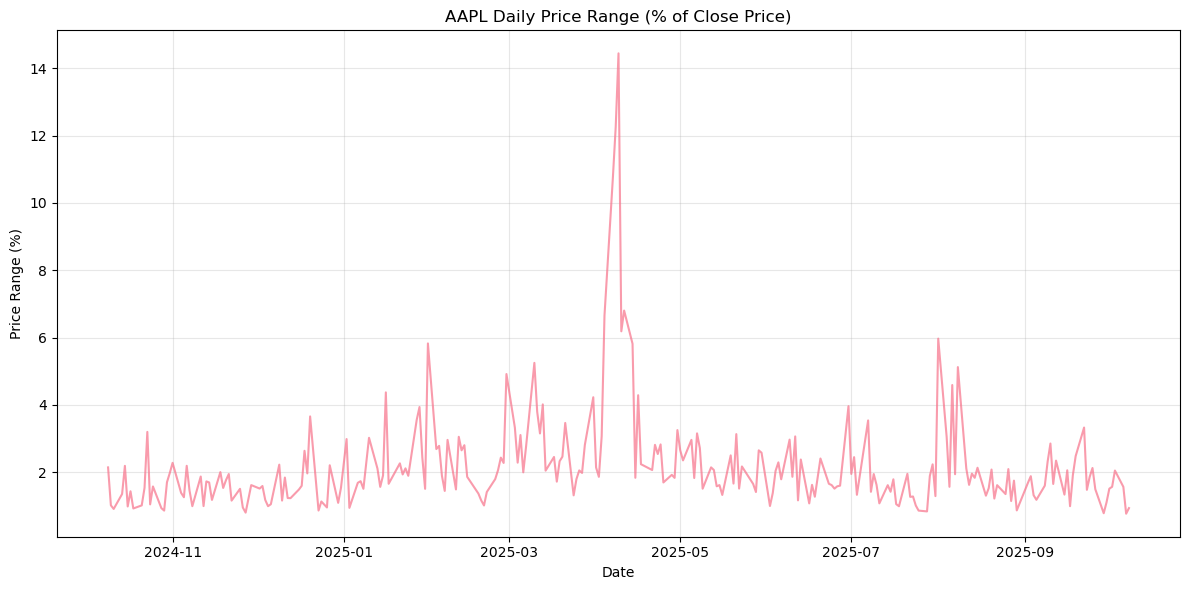

Average daily price range: 2.18%
Maximum daily price range: 14.44%


In [16]:
# Correlation analysis
price_columns = ['Open', 'High', 'Low', 'Close']
correlation_matrix = data[price_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title(f'{ticker_symbol} Price Correlation Matrix')
plt.tight_layout()
plt.show()

# Volume vs Price relationship
plt.figure(figsize=(12, 6))
plt.scatter(data['Volume'], data['Close'], alpha=0.5, s=20)
plt.xlabel('Volume')
plt.ylabel('Close Price ($)')
plt.title(f'{ticker_symbol} Volume vs Price Relationship')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Price range analysis
data['Price_Range'] = data['High'] - data['Low']
data['Price_Range_Pct'] = (data['Price_Range'] / data['Close']) * 100

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Price_Range_Pct'], alpha=0.7)
plt.title(f'{ticker_symbol} Daily Price Range (% of Close Price)')
plt.xlabel('Date')
plt.ylabel('Price Range (%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average daily price range: {data['Price_Range_Pct'].mean():.2f}%")
print(f"Maximum daily price range: {data['Price_Range_Pct'].max():.2f}%")


## 12. Summary and Key Takeaways

Let's summarize what we've learned about yfinance data.


In [17]:
print("📊 YFINANCE DATA SUMMARY")
print("=" * 50)

print("Key Data Fields Available:")
for col in data.columns:
    print(f"• {col}")

print(f"\nData Quality:")
print(f"• Total records: {len(data)}")
print(f"• Date range: {data.index[0].strftime('%Y-%m-%d')} to {data.index[-1].strftime('%Y-%m-%d')}")
print(f"• Missing data: {data.isnull().sum().sum()} total missing values")
print(f"• Data completeness: {((len(data) * len(data.columns) - data.isnull().sum().sum()) / (len(data) * len(data.columns))) * 100:.1f}%")

print(f"\nPrice Statistics:")
print(f"• Current price: ${data['Close'].iloc[-1]:.2f}")
print(f"• Year high: ${data['High'].max():.2f}")
print(f"• Year low: ${data['Low'].min():.2f}")
print(f"• Average volume: {data['Volume'].mean():,.0f}")

print(f"\nTime Periods Available:")
for period in ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']:
    print(f"• {period}")

print(f"\nIntervals Available:")
for interval in ['1m', '2m', '5m', '15m', '30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo', '3mo']:
    print(f"• {interval}")

print(f"\n✅ This notebook demonstrates all major aspects of yfinance data!")
print(f"✅ Perfect for understanding data structure before building analysis tools!")
print(f"✅ Great reference for our Stock Market Analysis Project!")


📊 YFINANCE DATA SUMMARY
Key Data Fields Available:
• Open
• High
• Low
• Close
• Volume
• Dividends
• Stock Splits
• Price_Range
• Price_Range_Pct

Data Quality:
• Total records: 250
• Date range: 2024-10-09 to 2025-10-08
• Missing data: 0 total missing values
• Data completeness: 100.0%

Price Statistics:
• Current price: $258.06
• Year high: $259.24
• Year low: $168.80
• Average volume: 53,838,818

Time Periods Available:
• 1d
• 5d
• 1mo
• 3mo
• 6mo
• 1y
• 2y
• 5y
• 10y
• ytd
• max

Intervals Available:
• 1m
• 2m
• 5m
• 15m
• 30m
• 60m
• 90m
• 1h
• 1d
• 5d
• 1wk
• 1mo
• 3mo

✅ This notebook demonstrates all major aspects of yfinance data!
✅ Perfect for understanding data structure before building analysis tools!
✅ Great reference for our Stock Market Analysis Project!


---

## Conclusion

This notebook has provided a comprehensive overview of yfinance data structure and capabilities. We've covered:

1. **Basic stock information** - Company details and metadata
2. **Historical data structure** - OHLCV data format and types
3. **Data quality analysis** - Missing data and completeness
4. **Statistical summaries** - Price distributions and statistics
5. **Time periods and intervals** - Available data ranges
6. **Data access methods** - Various ways to retrieve and manipulate data
7. **Special fields** - Dividends and stock splits
8. **Limitations and best practices** - Important considerations
9. **Project integration** - How we use this data in our analysis tool
10. **Interactive exploration** - Visualizations and correlations

This understanding is crucial for building robust financial analysis tools and ensures we can work effectively with real market data in our projects.

**Group Members:** Chanel, Do Tien Son, Marcus, Afiq, Hannah  
**Course:** INF1002 - PROGRAMMING FUNDAMENTALS, LAB-P13-3
